In [1]:
import requests
from bs4 import BeautifulSoup
from time import sleep
import pandas as pd
import numpy as np
import re

In [2]:
url = "https://topg.org/wow-private-servers/"

In [3]:
headers = {"user-agent": "edge"}
response = requests.get(url, headers = headers)

In [4]:
response.content

b'<!DOCTYPE html>\r\n<html lang="en">\r\n<head>\r\n\t<meta charset="UTF-8">\r\n    <meta name="viewport" content="width=device-width, initial-scale=1" />\r\n\t<title>Wow Private Servers - World of Warcraft Server | TopG</title>\r\n\t<meta name="description" content="Wow private servers best top list ranked by votes, expansions, realm type and rates. Promote your World of Warcraft private server for free to get more players." />\r\n\t<link rel="canonical" href="https://topg.org/wow-private-servers/" />\r\n\t<link rel="shortcut icon" href="/favicon.ico" />\r\n    <link rel="preconnect" href="https://static.cloudflareinsights.com" crossorigin>\r\n    <link rel="preload" href="/style/css/new_style.css?74" as="style" fetchpriority="high">\r\n    <link rel="stylesheet" href="/style/css/new_style.css?74" onload="this.onload=null;this.rel=\'stylesheet\'">\r\n    <noscript><link rel="stylesheet" href="/style/css/new_style.css?74"></noscript>\r\n    <link rel="preload" href="/style/css/fork-awes

In [5]:
soup = BeautifulSoup(response.content, {'html.parser'})
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [6]:
private_servers_dict = {}

private_s_names = soup.find_all("h3", class_="topg-server-name")

server_names = []

for tag in private_s_names:
    name = tag.get_text(strip=True)
    server_names.append(name)

private_servers_dict["Server_names"] = server_names

private_servers_dict

{'Server_names': ['WoW-Mania - Blizlike',
  'Uwow X100 03.01.2026',
  'Uwow Asia',
  'Wow Legion Plus 2025',
  'EpicWow',
  'ArgusWow',
  'UltimoWoW - Hispano',
  'LegionPlus Sep 06',
  'Transcend-WoW',
  'MasterWoW 2024',
  'Eternal and Zone WoW',
  'NordEnd',
  'WoWServer Romania',
  'Shadoria 5.4.8',
  'Mythic Dawn Wow',
  'SarmatiaWoW',
  'Zone WoW',
  'Amber WoW',
  'TrueWoW',
  'Naxxramas-Progresive',
  'Mond-WoW',
  'WoWZuLL - WotLK',
  'TherapieWoW.cz',
  'MoP Germany',
  'Elysium Project',
  'S King WoW',
  'Back2Basics WoW',
  'Yggdrasil WoW',
  'BloodWoW-Wotlk',
  'Rising Gods',
  'MGAWoW-Shadow Reign',
  'Unitx WoW',
  'Wowaddicts Legion',
  'Reaper-WoW 255',
  'Origins WoW Asia',
  'Max-WoW Wotlk server',
  'FELBORNE - DE - ENG',
  'KrigsGaldr Project',
  'Eternion Wow',
  'Stormgarde',
  'World of The Gods',
  'Mega-wow.de',
  'Evolutionz-WoW',
  'Azeroth of War',
  'Frostreaper-WoW',
  'Primordium WoW',
  'ReforgedCraft Wotlk',
  'MasterWoW Legacy',
  'EVOWOW',
  'Elunar

In [7]:
server_rows = soup.find_all("li", class_="topg-server")
len(server_rows)

50

In [8]:
server_rows = soup.find_all("li", class_="topg-server")
len(server_rows)

patches = []

for row in server_rows:
    
    stats = row.find("div", class_="topg-col-stats")
    spans = stats.find_all("span", class_="label label-primary") if stats else []

    patch_value = None

    for s in spans:
        text = s.get_text(strip=True)

        if re.match(r"^\d+(\.\d+){1,2}[a-z]?$", text.lower()):
            patch_value = text
            break
    
    patches.append(patch_value)

private_servers_dict["patch"] = patches
private_servers_dict

{'Server_names': ['WoW-Mania - Blizlike',
  'Uwow X100 03.01.2026',
  'Uwow Asia',
  'Wow Legion Plus 2025',
  'EpicWow',
  'ArgusWow',
  'UltimoWoW - Hispano',
  'LegionPlus Sep 06',
  'Transcend-WoW',
  'MasterWoW 2024',
  'Eternal and Zone WoW',
  'NordEnd',
  'WoWServer Romania',
  'Shadoria 5.4.8',
  'Mythic Dawn Wow',
  'SarmatiaWoW',
  'Zone WoW',
  'Amber WoW',
  'TrueWoW',
  'Naxxramas-Progresive',
  'Mond-WoW',
  'WoWZuLL - WotLK',
  'TherapieWoW.cz',
  'MoP Germany',
  'Elysium Project',
  'S King WoW',
  'Back2Basics WoW',
  'Yggdrasil WoW',
  'BloodWoW-Wotlk',
  'Rising Gods',
  'MGAWoW-Shadow Reign',
  'Unitx WoW',
  'Wowaddicts Legion',
  'Reaper-WoW 255',
  'Origins WoW Asia',
  'Max-WoW Wotlk server',
  'FELBORNE - DE - ENG',
  'KrigsGaldr Project',
  'Eternion Wow',
  'Stormgarde',
  'World of The Gods',
  'Mega-wow.de',
  'Evolutionz-WoW',
  'Azeroth of War',
  'Frostreaper-WoW',
  'Primordium WoW',
  'ReforgedCraft Wotlk',
  'MasterWoW Legacy',
  'EVOWOW',
  'Elunar

In [9]:
rankings = []

for rows in server_rows:

    ranking = rows.find('div', class_="topg-col-rank")
    rank_value = ranking.get_text(strip = True) if ranking else None
    rankings.append(rank_value)

private_servers_dict['rank'] = rankings
private_servers_dict

{'Server_names': ['WoW-Mania - Blizlike',
  'Uwow X100 03.01.2026',
  'Uwow Asia',
  'Wow Legion Plus 2025',
  'EpicWow',
  'ArgusWow',
  'UltimoWoW - Hispano',
  'LegionPlus Sep 06',
  'Transcend-WoW',
  'MasterWoW 2024',
  'Eternal and Zone WoW',
  'NordEnd',
  'WoWServer Romania',
  'Shadoria 5.4.8',
  'Mythic Dawn Wow',
  'SarmatiaWoW',
  'Zone WoW',
  'Amber WoW',
  'TrueWoW',
  'Naxxramas-Progresive',
  'Mond-WoW',
  'WoWZuLL - WotLK',
  'TherapieWoW.cz',
  'MoP Germany',
  'Elysium Project',
  'S King WoW',
  'Back2Basics WoW',
  'Yggdrasil WoW',
  'BloodWoW-Wotlk',
  'Rising Gods',
  'MGAWoW-Shadow Reign',
  'Unitx WoW',
  'Wowaddicts Legion',
  'Reaper-WoW 255',
  'Origins WoW Asia',
  'Max-WoW Wotlk server',
  'FELBORNE - DE - ENG',
  'KrigsGaldr Project',
  'Eternion Wow',
  'Stormgarde',
  'World of The Gods',
  'Mega-wow.de',
  'Evolutionz-WoW',
  'Azeroth of War',
  'Frostreaper-WoW',
  'Primordium WoW',
  'ReforgedCraft Wotlk',
  'MasterWoW Legacy',
  'EVOWOW',
  'Elunar

In [10]:
base = "https://topg.org/wow-private-servers"

urls = []

for page in range(1, 4):

    if page == 1:
        url = base + "/"
    else:
        url = f"{base}/page/{page}"

    print("Scraping:", url)
    urls.append(url)

Scraping: https://topg.org/wow-private-servers/
Scraping: https://topg.org/wow-private-servers/page/2
Scraping: https://topg.org/wow-private-servers/page/3


In [11]:
private_servers_dict

{'Server_names': ['WoW-Mania - Blizlike',
  'Uwow X100 03.01.2026',
  'Uwow Asia',
  'Wow Legion Plus 2025',
  'EpicWow',
  'ArgusWow',
  'UltimoWoW - Hispano',
  'LegionPlus Sep 06',
  'Transcend-WoW',
  'MasterWoW 2024',
  'Eternal and Zone WoW',
  'NordEnd',
  'WoWServer Romania',
  'Shadoria 5.4.8',
  'Mythic Dawn Wow',
  'SarmatiaWoW',
  'Zone WoW',
  'Amber WoW',
  'TrueWoW',
  'Naxxramas-Progresive',
  'Mond-WoW',
  'WoWZuLL - WotLK',
  'TherapieWoW.cz',
  'MoP Germany',
  'Elysium Project',
  'S King WoW',
  'Back2Basics WoW',
  'Yggdrasil WoW',
  'BloodWoW-Wotlk',
  'Rising Gods',
  'MGAWoW-Shadow Reign',
  'Unitx WoW',
  'Wowaddicts Legion',
  'Reaper-WoW 255',
  'Origins WoW Asia',
  'Max-WoW Wotlk server',
  'FELBORNE - DE - ENG',
  'KrigsGaldr Project',
  'Eternion Wow',
  'Stormgarde',
  'World of The Gods',
  'Mega-wow.de',
  'Evolutionz-WoW',
  'Azeroth of War',
  'Frostreaper-WoW',
  'Primordium WoW',
  'ReforgedCraft Wotlk',
  'MasterWoW Legacy',
  'EVOWOW',
  'Elunar

In [12]:
private_servers_dict = {
    "Server_names": [],
    "patch": [],
    "rank": [],
    "url": []
}

In [13]:
headers = {"User-Agent": "Mozilla/5.0"}

In [14]:
for url in urls:

    print("Scraping page:", url)

    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, "html.parser")

    server_rows = soup.find_all("li", class_="topg-server")

    for row in server_rows:

        # --- name ---
        name_tag = row.find("h3", class_="topg-server-name")
        name = name_tag.get_text(strip=True) if name_tag else None
        private_servers_dict["Server_names"].append(name)

        # --- rank ---
        rank_div = row.find("div", class_="topg-col-rank")
        rank = rank_div.get_text(strip=True) if rank_div else None
        private_servers_dict["rank"].append(rank)

        # --- link ---
        a = row.find("a", class_="nop")
        link = "https://topg.org" + a["href"] if a and "href" in a.attrs else None
        private_servers_dict["url"].append(link)

        # --- patch (numeric only) ---
        stats = row.find("div", class_="topg-col-stats")
        spans = stats.find_all("span", class_="label label-primary") if stats else []

        patch_value = None
        for s in spans:
            text = s.get_text(strip=True)
            if re.match(r"^\d+(\.\d+){1,2}[a-z]?$", text.lower()):
                patch_value = text
                break

        private_servers_dict["patch"].append(patch_value)

private_servers_dict

Scraping page: https://topg.org/wow-private-servers/
Scraping page: https://topg.org/wow-private-servers/page/2
Scraping page: https://topg.org/wow-private-servers/page/3


{'Server_names': ['WoW-Mania - Blizlike',
  'Uwow X100 03.01.2026',
  'Uwow Asia',
  'Wow Legion Plus 2025',
  'EpicWow',
  'ArgusWow',
  'UltimoWoW - Hispano',
  'LegionPlus Sep 06',
  'Transcend-WoW',
  'MasterWoW 2024',
  'Eternal and Zone WoW',
  'NordEnd',
  'WoWServer Romania',
  'Shadoria 5.4.8',
  'Mythic Dawn Wow',
  'SarmatiaWoW',
  'Zone WoW',
  'Amber WoW',
  'TrueWoW',
  'Naxxramas-Progresive',
  'Mond-WoW',
  'WoWZuLL - WotLK',
  'TherapieWoW.cz',
  'MoP Germany',
  'Elysium Project',
  'S King WoW',
  'Back2Basics WoW',
  'Yggdrasil WoW',
  'BloodWoW-Wotlk',
  'Rising Gods',
  'MGAWoW-Shadow Reign',
  'Unitx WoW',
  'Wowaddicts Legion',
  'Reaper-WoW 255',
  'Origins WoW Asia',
  'Max-WoW Wotlk server',
  'FELBORNE - DE - ENG',
  'KrigsGaldr Project',
  'Eternion Wow',
  'Stormgarde',
  'World of The Gods',
  'Mega-wow.de',
  'Evolutionz-WoW',
  'Azeroth of War',
  'Frostreaper-WoW',
  'Primordium WoW',
  'ReforgedCraft Wotlk',
  'MasterWoW Legacy',
  'EVOWOW',
  'Elunar

In [15]:
for k, v in private_servers_dict.items():
    print(k, len(v))

Server_names 150
patch 150
rank 150
url 150


In [16]:
list(zip(
    private_servers_dict["Server_names"],
    private_servers_dict["patch"],
    private_servers_dict["rank"]
))[:10]

[('WoW-Mania - Blizlike', '3.3.5a', '1'),
 ('Uwow X100 03.01.2026', '7.3.5', '2'),
 ('Uwow Asia', '7.2.0', '3'),
 ('Wow Legion Plus 2025', '7.3.5', '4'),
 ('EpicWow', '7.3.5', '5'),
 ('ArgusWow', '7.3.5', '6'),
 ('UltimoWoW - Hispano', '3.3.5a', '7'),
 ('LegionPlus Sep 06', '7.3.5', '8'),
 ('Transcend-WoW', '3.3.5', '9'),
 ('MasterWoW 2024', '3.3.5a', '10')]

In [17]:
df = pd.DataFrame(private_servers_dict)
df.head()

,Server_names,patch,rank,url
0,WoW-Mania - Blizlike,3.3.5a,1,https://topg.org/wow-private-servers/server-65...
1,Uwow X100 03.01.2026,7.3.5,2,https://topg.org/wow-private-servers/server-47...
2,Uwow Asia,7.2.0,3,https://topg.org/wow-private-servers/server-48...
3,Wow Legion Plus 2025,7.3.5,4,https://topg.org/wow-private-servers/server-66...
4,EpicWow,7.3.5,5,https://topg.org/wow-private-servers/server-42...


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Server_names  150 non-null    object
 1   patch         133 non-null    object
 2   rank          150 non-null    object
 3   url           150 non-null    object
dtypes: object(4)
memory usage: 4.8+ KB


In [19]:
df.to_csv("wow_private_servers", index = False)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Server_names  150 non-null    object
 1   patch         133 non-null    object
 2   rank          150 non-null    object
 3   url           150 non-null    object
dtypes: object(4)
memory usage: 4.8+ KB


In [43]:
df['rank'] = pd.to_numeric(df['rank'])

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Server_names  150 non-null    object
 1   patch         133 non-null    object
 2   rank          150 non-null    int64 
 3   url           150 non-null    object
dtypes: int64(1), object(3)
memory usage: 4.8+ KB


In [49]:
df.head()

,Server_names,patch,rank,url
0,WoW-Mania - Blizlike,3.3.5a,1,https://topg.org/wow-private-servers/server-65...
1,Uwow X100 03.01.2026,7.3.5,2,https://topg.org/wow-private-servers/server-47...
2,Uwow Asia,7.2.0,3,https://topg.org/wow-private-servers/server-48...
3,Wow Legion Plus 2025,7.3.5,4,https://topg.org/wow-private-servers/server-66...
4,EpicWow,7.3.5,5,https://topg.org/wow-private-servers/server-42...


In [51]:
df.shape

(150, 4)

In [53]:
df.isna().sum()

Server_names     0
patch           17
rank             0
url              0
dtype: int64

In [55]:
df["patch"].value_counts()

patch
3.3.5a    61
3.3.5     23
4.3.4     12
7.3.5      8
2.4.3      7
5.4.8      6
1.12.1     6
1.12       4
7.2.0      2
11.2.7     1
7.0.3      1
1.21.8     1
10.2       1
Name: count, dtype: int64

In [59]:
df["expansion_major"] = df["patch"].str.split(".").str[0]

In [63]:
expansion_map = {
    "1": "Vanilla",
    "2": "The Burning Crusade",
    "3": "Wrath of the Lich King",
    "4": "Cataclysm",
    "5": "Mists of Pandaria",
    "6": "Warlords of Draenor",
    "7": "Legion",
    "8": "Battle for Azeroth",
    "9": "Shadowlands",
    "10": "Dragonflight",
    "11": "The War Within"
}

df['expansion'] = df['expansion_major'].map(expansion_map)

In [67]:
df.head(15)

,Server_names,patch,rank,url,expansion_major,expansion
0,WoW-Mania - Blizlike,3.3.5a,1,https://topg.org/wow-private-servers/server-65...,3,Wrath of the Lich King
1,Uwow X100 03.01.2026,7.3.5,2,https://topg.org/wow-private-servers/server-47...,7,Legion
2,Uwow Asia,7.2.0,3,https://topg.org/wow-private-servers/server-48...,7,Legion
3,Wow Legion Plus 2025,7.3.5,4,https://topg.org/wow-private-servers/server-66...,7,Legion
4,EpicWow,7.3.5,5,https://topg.org/wow-private-servers/server-42...,7,Legion
5,ArgusWow,7.3.5,6,https://topg.org/wow-private-servers/server-50...,7,Legion
6,UltimoWoW - Hispano,3.3.5a,7,https://topg.org/wow-private-servers/server-49...,3,Wrath of the Lich King
7,LegionPlus Sep 06,7.3.5,8,https://topg.org/wow-private-servers/server-65...,7,Legion
8,Transcend-WoW,3.3.5,9,https://topg.org/wow-private-servers/server-47...,3,Wrath of the Lich King
9,MasterWoW 2024,3.3.5a,10,https://topg.org/wow-private-servers/server-66...,3,Wrath of the Lich King


In [77]:
df["expansion"].value_counts()

expansion
Wrath of the Lich King    84
Cataclysm                 12
Legion                    11
Vanilla                   11
The Burning Crusade        7
Mists of Pandaria          6
The War Within             1
Dragonflight               1
Name: count, dtype: int64

In [83]:
df.groupby("expansion")["rank"].mean().sort_values(ascending = False) 

#lower number = better ranking / higher visibility
#higher number = lower ranking

expansion
Dragonflight              134.000000
Vanilla                    98.909091
Cataclysm                  91.083333
Wrath of the Lich King     75.154762
The Burning Crusade        71.857143
Mists of Pandaria          59.000000
Legion                     36.181818
The War Within             12.000000
Name: rank, dtype: float64

<Axes: title={'center': 'Server Count per Expansion'}, xlabel='expansion'>

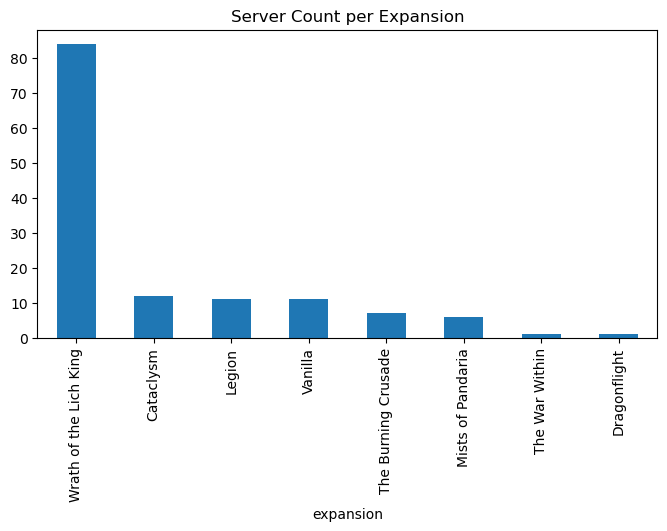

In [85]:
df["expansion"].value_counts().plot(kind="bar", figsize=(8,4), title="Server Count per Expansion")

<Axes: title={'center': 'Average Rank by Expansion'}, xlabel='expansion'>

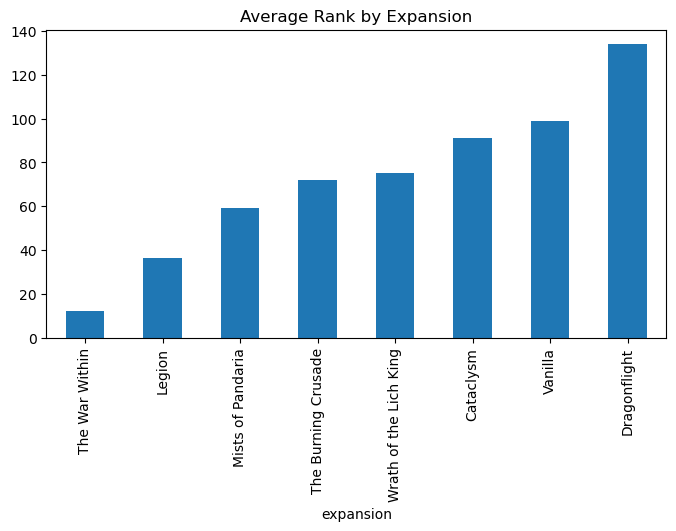

In [87]:
df.groupby("expansion")["rank"].mean().sort_values().plot(kind="bar", figsize=(8,4), title="Average Rank by Expansion")

In [91]:
df.to_csv("wow_private_servers_clean_top300.csv", index=False)